In [5]:
!pip install tensorflow-gpu==2.0.0-rc0

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.0-rc0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.8.0rc0, 2.8.0rc1, 2.8.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.0-rc0


In [87]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.8.0


In [88]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
!git clone https://github.com/sahilabudhwani/ML-Detection-for-Malaria.git

Cloning into 'ML-Detection-for-Malaria'...
remote: Enumerating objects: 27568, done.
remote: Counting objects: 100% (27568/27568), done.
remote: Compressing objects: 100% (27567/27567), done.
remote: Total 27568 (delta 1), reused 27567 (delta 0), pack-reused 0
Receiving objects: 100% (27568/27568), 331.64 MiB | 36.90 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (27561/27561), done.


In [ ]:
import os, random
import cv2
import matplotlib.pyplot as plt

directory = '/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/'

print('Infected Cell Images')
for x in os.listdir(directory)[:5]:
  image = cv2.imread("/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/"+x)
  
  plt.imshow(image)
  print(f'This is the shape of the image {image.shape} and {image.size} pixels')     
  
  plt.show()

In [ ]:
import os, random
import cv2
import matplotlib.pyplot as plt

directory1 = '/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/'

print('Uninfected Cell Images')
for x in os.listdir(directory1)[:5]:
  image = cv2.imread("/content/Malaria-Classification-Using-CNN/malaria-dataset/Uninfected/"+x)
  
  plt.imshow(image)
  print(f'This is the shape of the image {image.shape} and {image.size} pixels')     
  
  plt.show()

In [89]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [90]:
img_width = 50
img_height = 50

In [91]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [92]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


CNN model archtecture 

In [97]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [99]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

In [ ]:
history.history

In [18]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

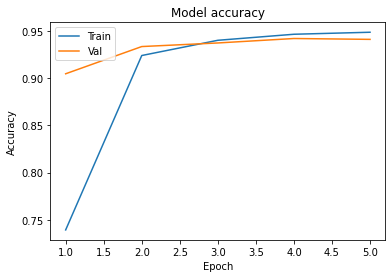

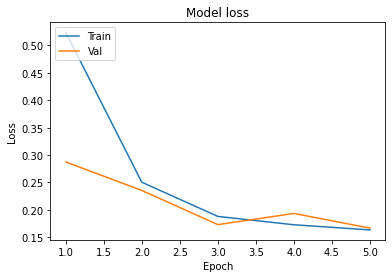

In [21]:
plot_learningCurve(history, 5)